In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from ucimlrepo import fetch_ucirepo

# Load the dataset
dataset = fetch_ucirepo(id=544)

# Data (as pandas dataframes)
X = dataset.data.features
y = dataset.data.targets['NObeyesdad']


In [3]:
# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Preprocessor for categorical variables
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(), categorical_cols)
    ],
    remainder='passthrough'
)

In [4]:
# Fit and transform the data
X_transformed = preprocessor.fit_transform(X)

# Get the column names for the transformed data
onehotencoder = preprocessor.named_transformers_['onehot']
encoded_categorical_cols = onehotencoder.get_feature_names_out(categorical_cols)
all_columns = np.hstack([encoded_categorical_cols, X.drop(columns=categorical_cols).columns])

# Create a DataFrame with the transformed data
X_transformed_df = pd.DataFrame(X_transformed, columns=all_columns)

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_transformed_df, y, test_size=0.2, random_state=42)


In [6]:
# Train a RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [7]:
# Extract feature importances
feature_importances = rf.feature_importances_

# Create a DataFrame for visualization
feature_importances_df = pd.DataFrame({
    'Feature': all_columns,
    'Importance': feature_importances
})

In [8]:
# Sort the DataFrame by importance
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

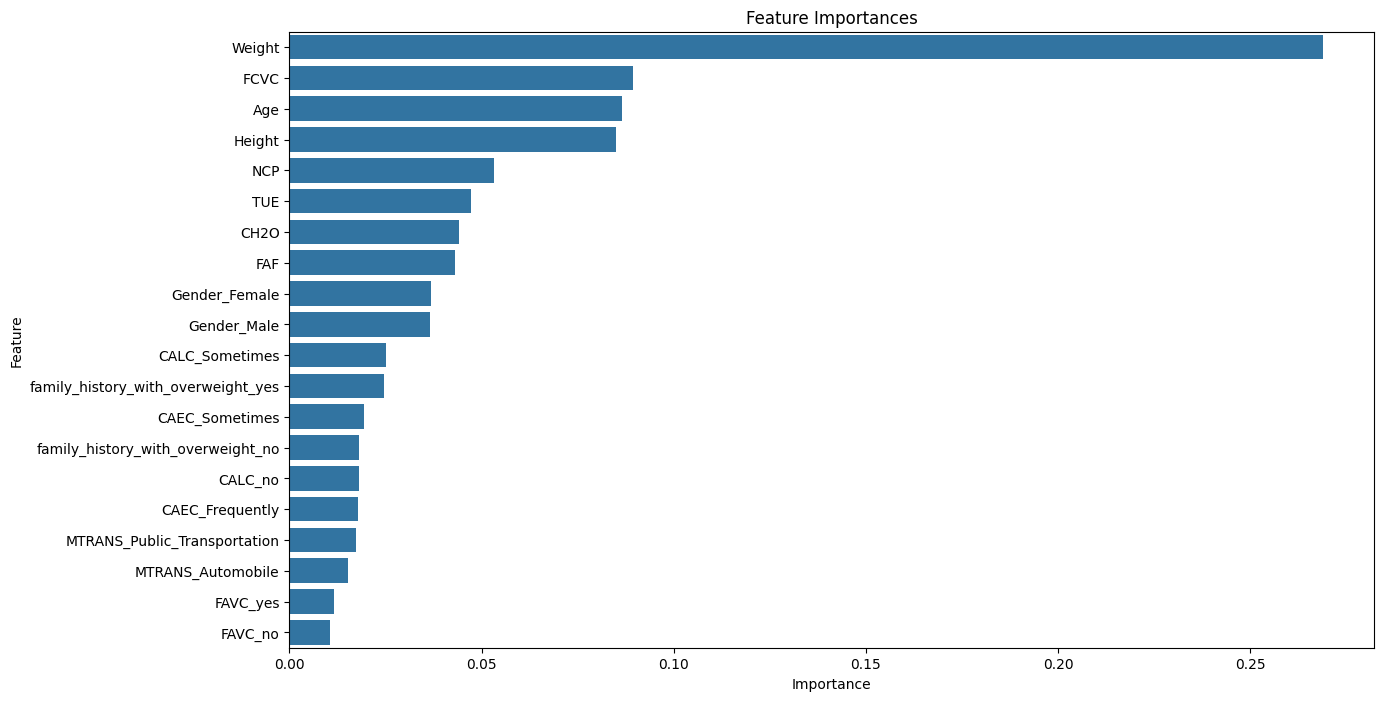

In [9]:
# Plot the feature importances
plt.figure(figsize=(14, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances_df.head(20))  # Plot top 20 features
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Distribution of the target variable for original data (498 people)

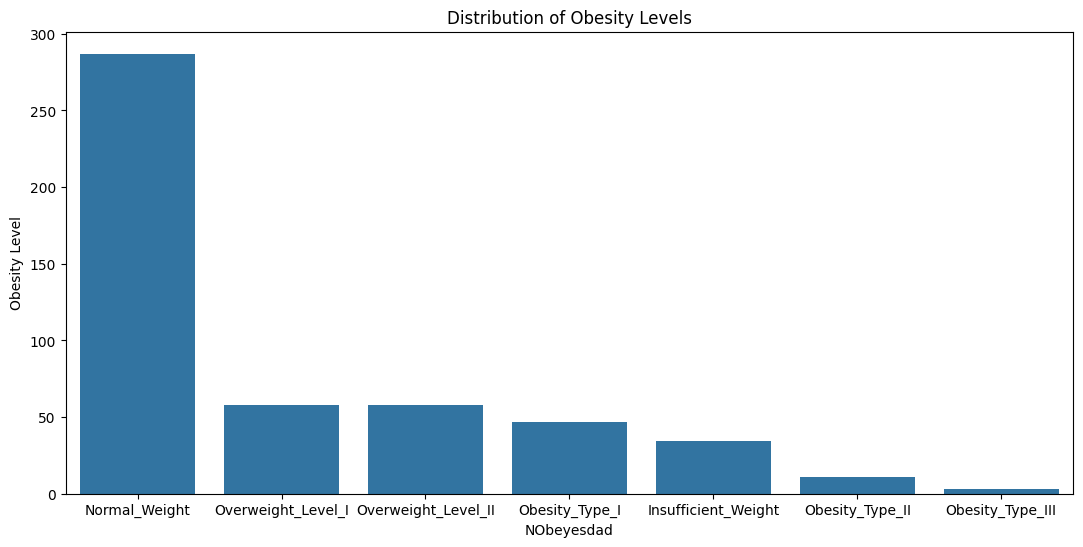

In [19]:
plt.figure(figsize=(13, 6))
sns.countplot(x=y[:498])
plt.title('Distribution of Obesity Levels')
plt.ylabel('Obesity Level')
plt.show()

# Distribution of the target variable for whole dataset

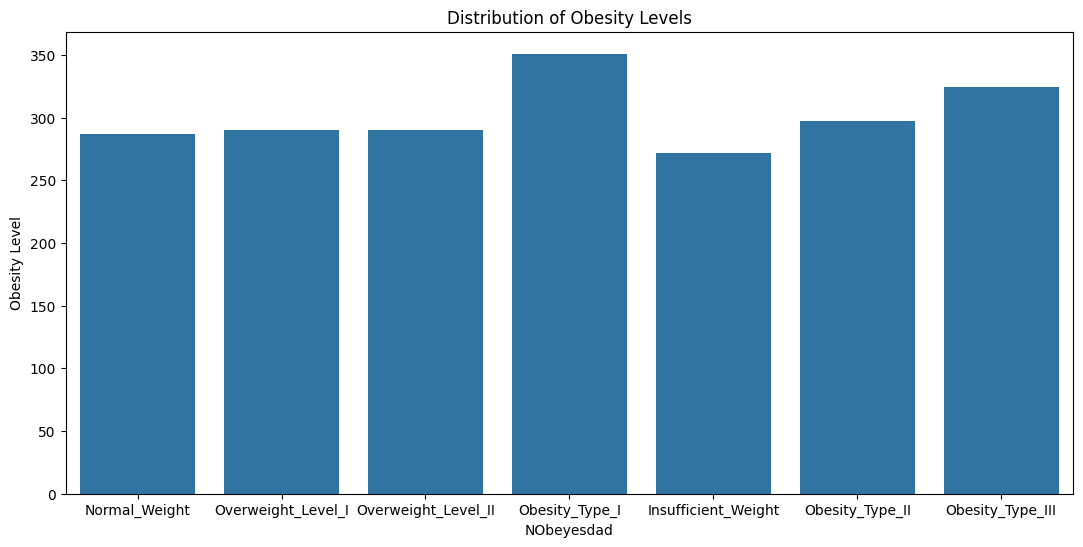

In [20]:
plt.figure(figsize=(13, 6))
sns.countplot(x=y)
plt.title('Distribution of Obesity Levels')
plt.ylabel('Obesity Level')
plt.show()

In [14]:
def categorize_weight(row):
    weight_index = row['Weight'] / (row['Height'] ** 2)
    if weight_index < 18.5:
        return 'Underweight'
    elif 18.5 <= weight_index < 25:
        return 'Normal'
    elif 25 <= weight_index < 30:
        return 'Overweight'
    elif 30 <= weight_index < 35:
        return 'Obesity I'
    elif 35 <= weight_index < 40:
        return 'Obesity II'
    else:
        return 'Obesity III'

X['Weight_Category'] = X.apply(categorize_weight, axis=1)
X_transformed_df['Weight_Category'] = X['Weight_Category'].values


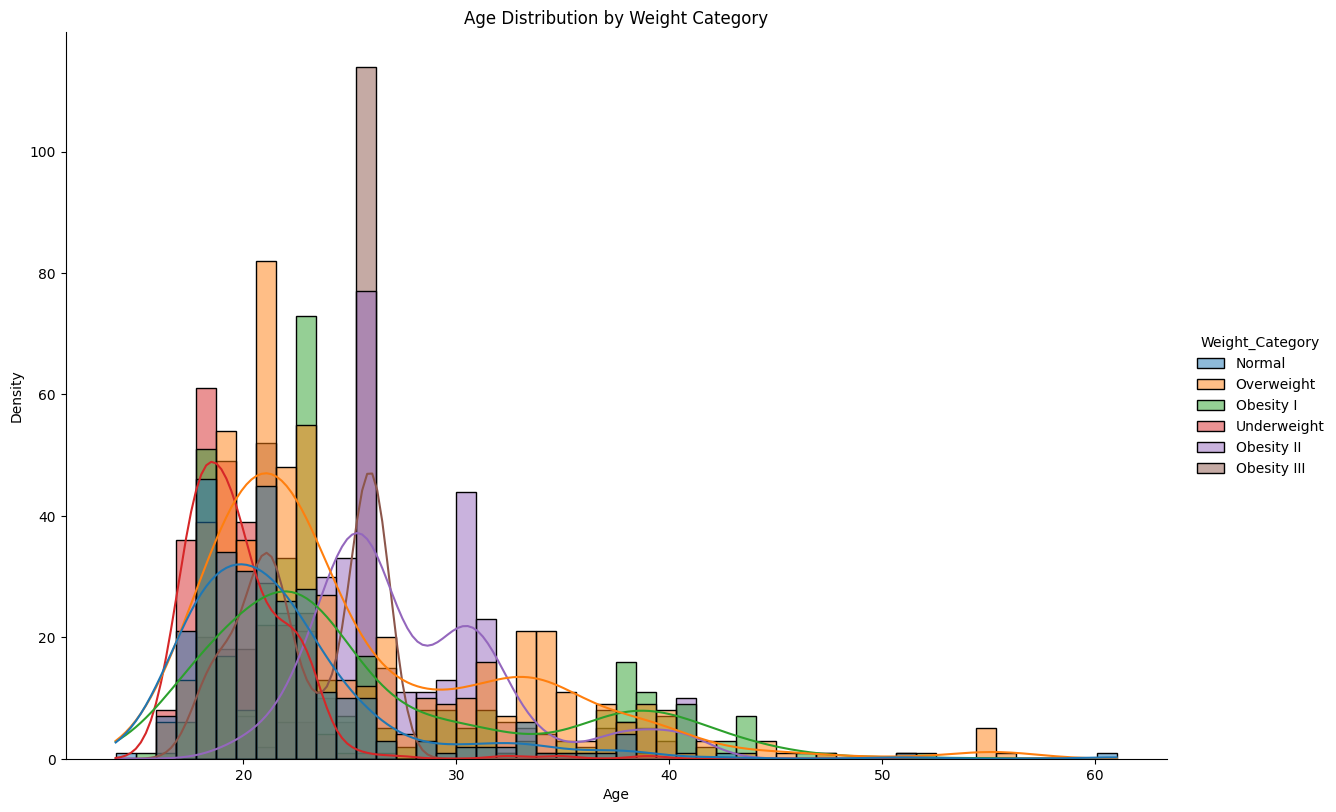

In [27]:
def create_distplot(dataframe, column):
    sns.displot(dataframe, x=column, hue="Weight_Category", kde=True, height=8, aspect=1.5)
    plt.title(f'{column.capitalize()} Distribution by Weight Category')
    plt.xlabel(column.capitalize())
    plt.ylabel('Density')
    plt.show()

create_distplot(X_transformed_df, 'Age')

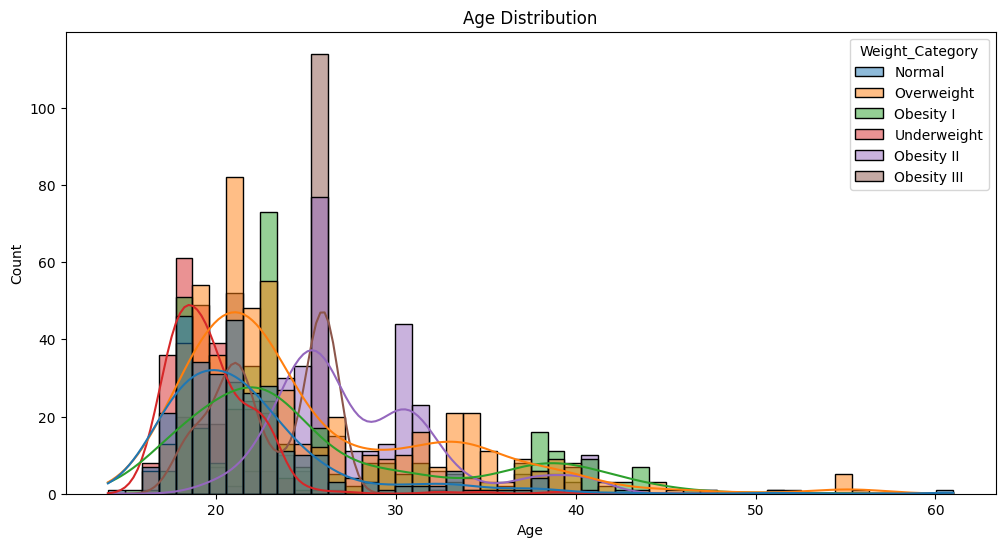

In [16]:
def create_hist(data, x, hue, kde=True):
    plt.figure(figsize=(12, 6))
    sns.histplot(data=data, x=x, hue=hue, kde=kde)
    plt.title(f'{x.capitalize()} Distribution')
    plt.xlabel(x.capitalize())
    plt.ylabel('Count')
    plt.show()

create_hist(X_transformed_df, 'Age', 'Weight_Category')

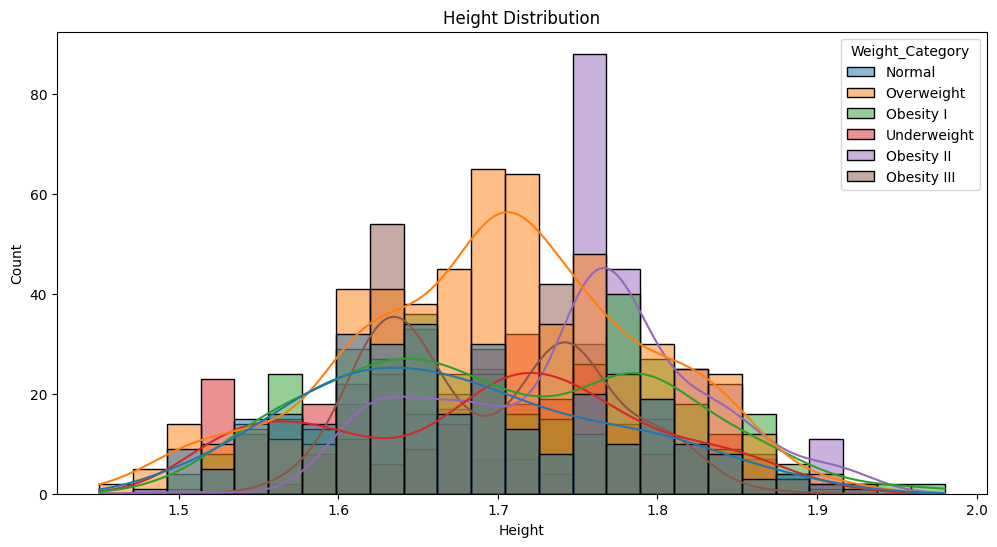

In [17]:
create_hist(X_transformed_df, 'Height', 'Weight_Category')

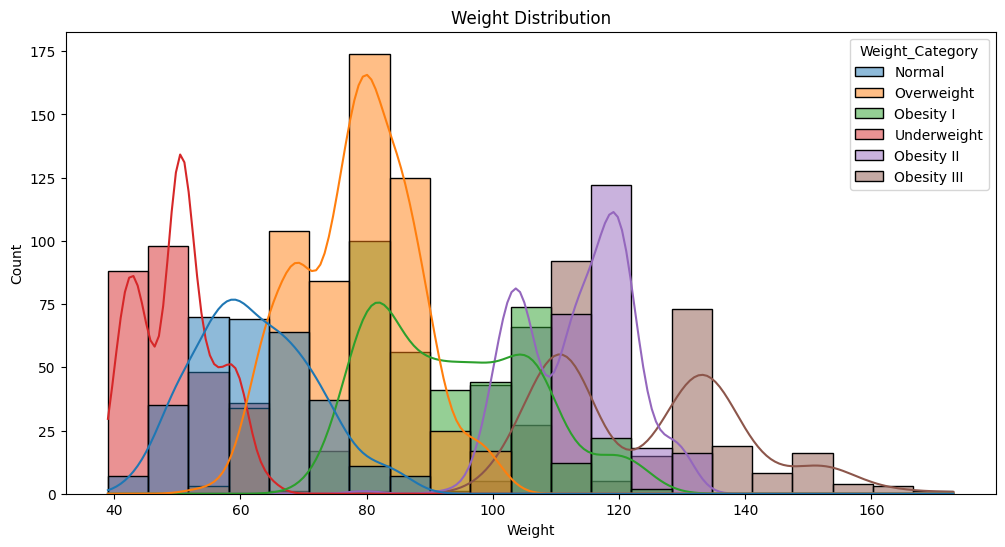

In [18]:
create_hist(X_transformed_df, 'Weight', 'Weight_Category')

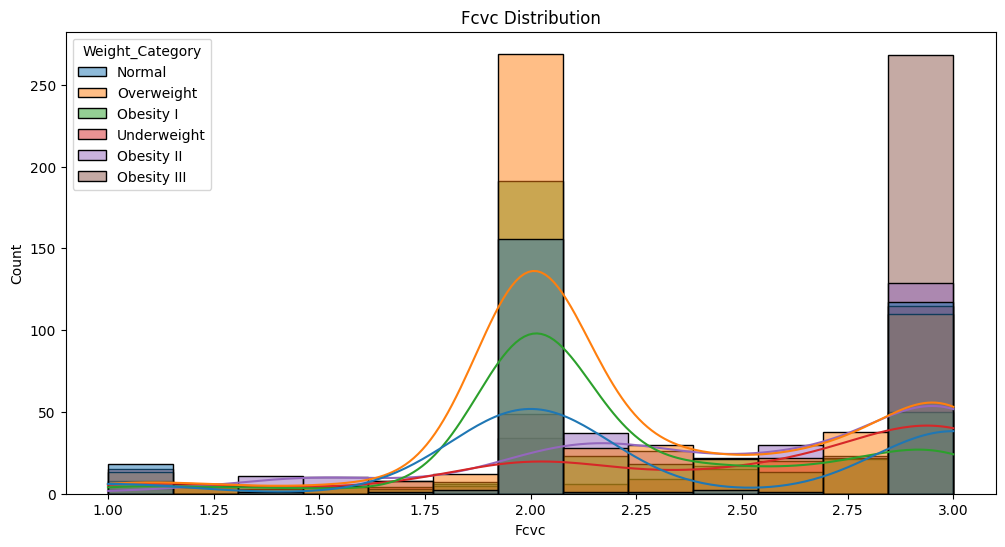

In [19]:
create_hist(X_transformed_df, 'FCVC', 'Weight_Category')

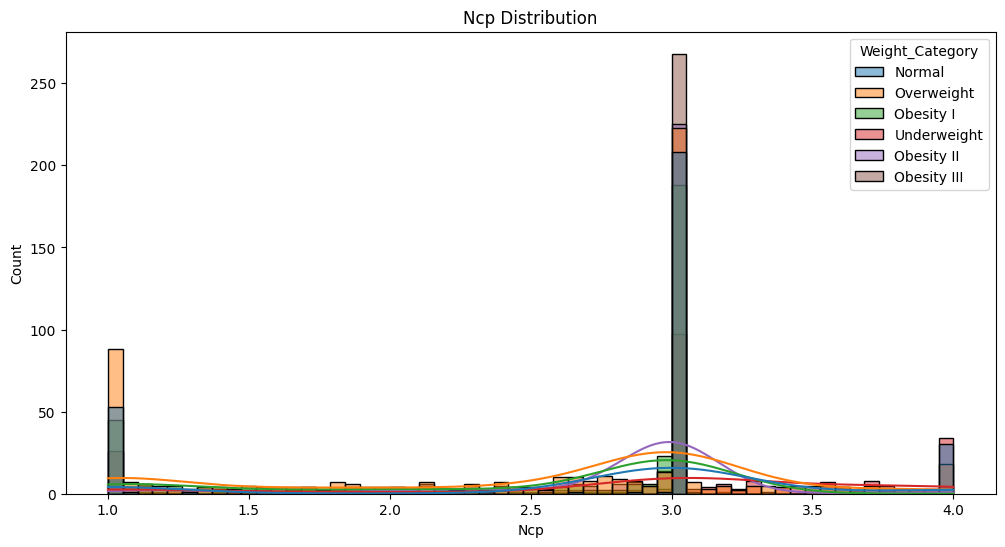

In [20]:
create_hist(X_transformed_df, 'NCP', 'Weight_Category')

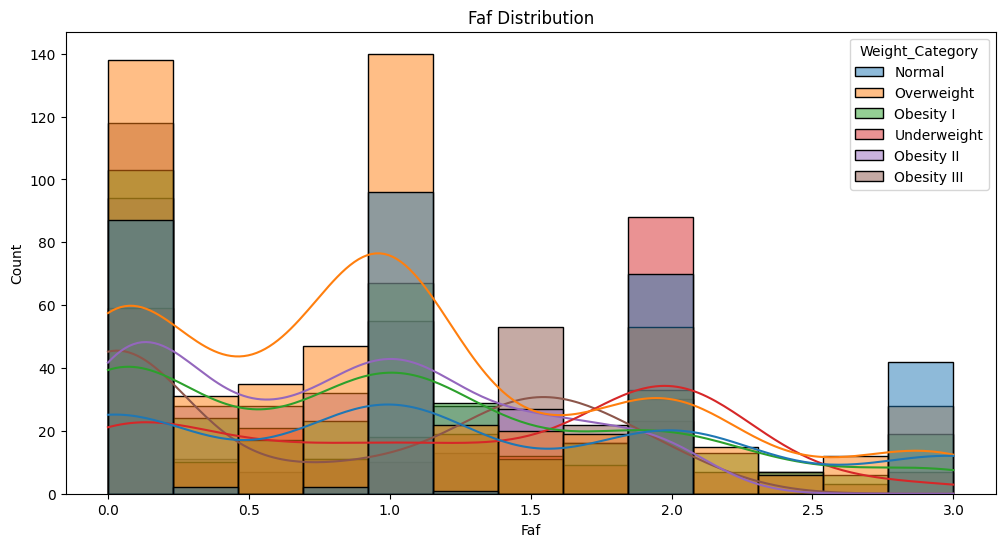

In [21]:
create_hist(X_transformed_df, 'FAF', 'Weight_Category')

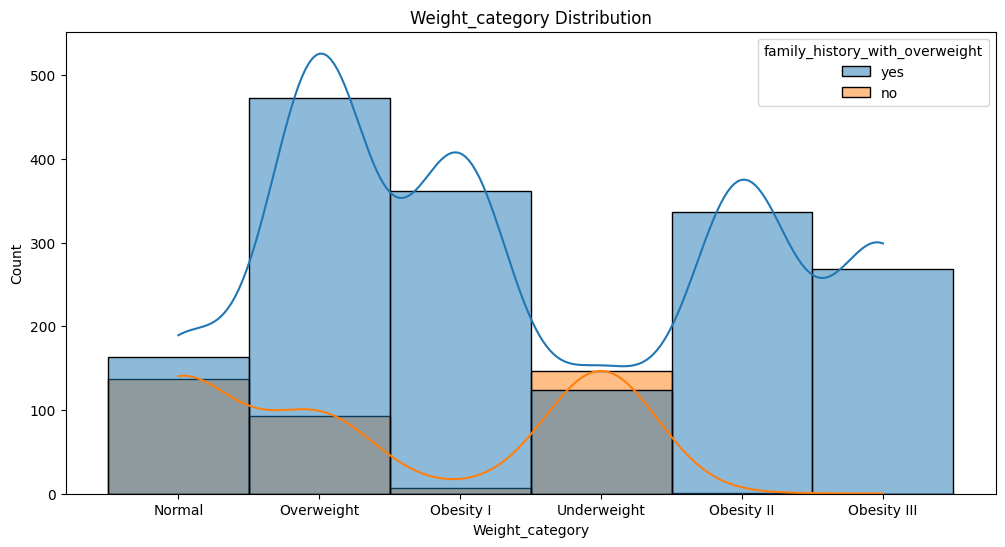

In [23]:
create_hist(X, 'Weight_Category', 'family_history_with_overweight')

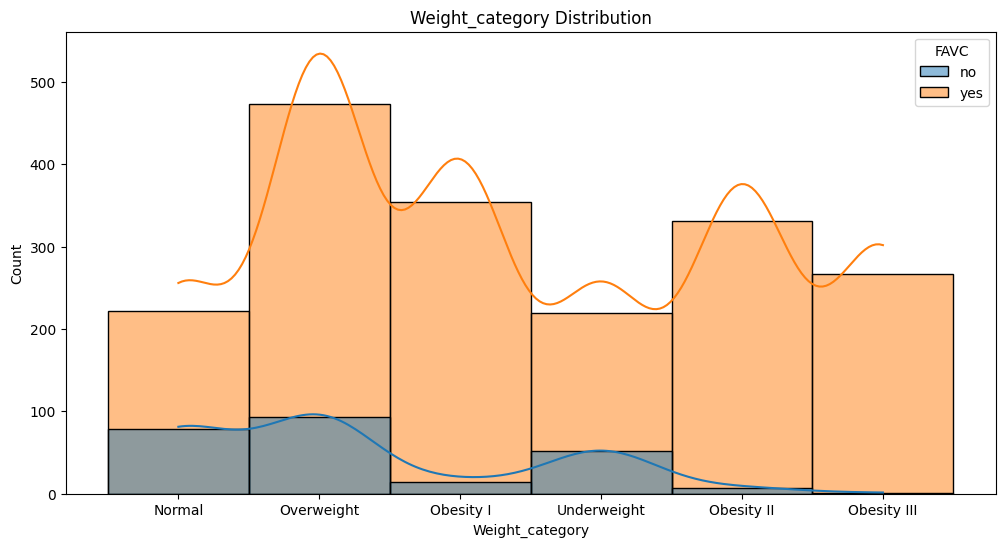

In [24]:
_ = create_hist(X, 'Weight_Category', 'FAVC')

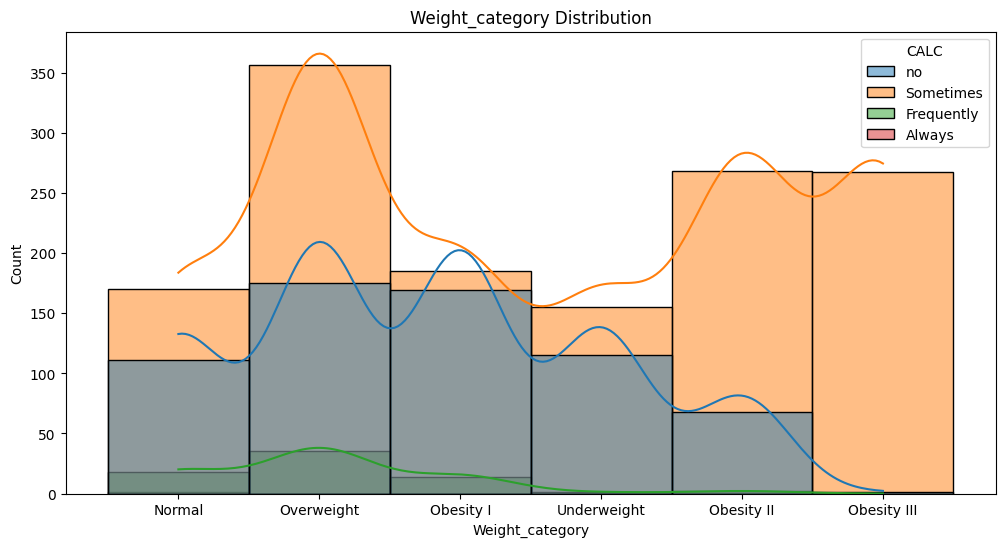

In [25]:
create_hist(X, 'Weight_Category', 'CALC')

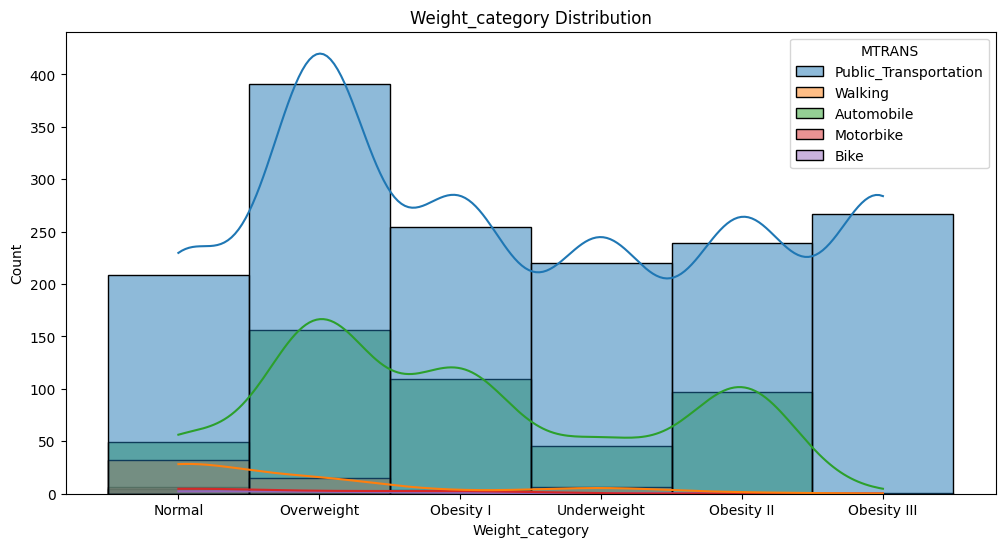

In [26]:
create_hist(X, 'Weight_Category', 'MTRANS')